In [1]:
# %load ImportsDefinitions.py
#!/usr/bin/env python

# In[ ]:


# %load ImportsDefinitions.py
#!/usr/bin/env python

# In[ ]:


#Imports
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree

from sklearn.svm import LinearSVC


import seaborn as sns

#accuracy_score(labels_test,pred)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib 

from sklearn.naive_bayes import MultinomialNB
#accuracy_score(labels_test,pred)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB


from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')


# In[1]:


#Ορισμός συναρτήσεων για να ελέξγχουμε τον καλύτερο vectorizer
def tfidf_test_simple(X_train,X_test,y_train,y_test,token_izer):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor)
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb)
    else:
        tfvect= TfidfVectorizer()
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    #train the model and timing it
    #kanoume prediction gia to x_test_dtm
    
    # cross val score/ predict
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("to accuracy tou TFIDF einai {}".format(cvec_score.mean()))
    
    visualizer = FreqDistVisualizer(features=feature_names, orient='h')
    visualizer.fit(tfidf_train)
    visualizer.poof()
    
    return cvec_score.mean()

def countvect_test_simple(X_train,X_test,y_train,y_test,token_izer):
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor)
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb)
    else:
        countvect= CountVectorizer()
    #CountVect
    countvect.fit(X_train)
    #to metatrepoume se dtm sparse matrix
    X_train_dtm=countvect.transform(X_train)
    X_test_dtm=countvect.transform(X_test)
    #Ftiaxnoume Multinomial Naive Bayes modelo
    nb=MultinomialNB()
    #kanoume prediction gia to x_test_dtm
    
    # cross val score/ predict
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
        
          
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("to accuracy tou CountVectorizer einai: {}".format(cvec_score.mean()))
    
    visualizer = FreqDistVisualizer(features=feature_names, orient='h')
    visualizer.fit(X_train_dtm)
    visualizer.poof()
    
    return cvec_score.mean()


# In[9]:


#oρισμός συναρτήσεων για να ελέγχουμε το max_df
def countvect_test_maxdf(X_train,X_test,y_train,y_test,token_izer,maxdf):
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor,max_df=maxdf)
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_df=maxdf)
    else:
        countvect= CountVectorizer(max_df=maxdf)
    X_train_dtm = countvect.fit_transform(X_train)
    X_test_dtm = countvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
   
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy me Max df: {} είναι : {} ".format(maxdf,cvec_score))
    return cvec_score.mean()


def tfidf_test_maxdf(X_train,X_test,y_train,y_test,token_izer,maxdf):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor,max_df=maxdf)
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_df=maxdf)
    else:
        tfvect= TfidfVectorizer(max_df=maxdf)
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy me max df: {} είναι : {} ".format(maxdf,cvec_score))
    return cvec_score.mean()


# In[12]:


def countvect_test_ngrams(X_train,X_test,y_train,y_test,token_izer,ngrams):
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor,ngram_range=(1,ngrams))
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,ngram_range=(1,ngrams))
    else:
        countvect= CountVectorizer(ngram_range=(1,ngrams))
    X_train_dtm = countvect.fit_transform(X_train)
    X_test_dtm = countvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
   
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy me {}-ngrams είναι : {} ".format(ngrams,cvec_score))
    return cvec_score.mean()

def tfidf_test_ngrams(X_train,X_test,y_train,y_test,token_izer,ngrams):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor,ngram_range=(1,ngrams))
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb,ngram_range=(1,ngrams))
    else:
        tfvect= TfidfVectorizer(ngram_range=(1,ngrams))
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy me {}-ngrams είναι : {} ".format(ngrams,cvec_score))
    return cvec_score.mean()


# In[ ]:


def countvect_test_maxfeat(X_train,X_test,y_train,y_test,token_izer,maxfeat):  
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor,max_features=maxfeat)
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_features=maxfeat)
    else:
        countvect= CountVectorizer(max_features=maxfeat)
    X_train_dtm = countvect.fit_transform(X_train)
    X_test_dtm = countvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
   
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy me max features {} είναι : {} ".format(maxfeat,cvec_score))
    return cvec_score.mean()

def tfidf_test_maxfeat(X_train,X_test,y_train,y_test,token_izer,maxfeat):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor,max_features=maxfeat)
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_features=maxfeat)
    else:
        tfvect= TfidfVectorizer(max_features=maxfeat)
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy me max featurues : {} είναι : {} ".format(maxfeat,cvec_score))
    return cvec_score.mean()


# In[4]:


def tokenizer_preproccessor(text):
    stop = set(stopwords.words('english'))
    #kanoume preprocessing ta dedomena mas
    word_tokens=word_tokenize(text.lower()) #kanoume tokenize
    #print("Έχουμε " + str(len(word_tokens))+ " tokens")
    #filtered_word_tokens = [word for word in word_tokens if word not in stop] #svinoume ta stopwords
    #print("Αφού αφαιρέσαμε τα stopwords, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
    filtered_word_tokens = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in word_tokens]  #svinoume ta punctuations
    #filtered_word_tokens = [x for x in filtered_word_tokens if x not in ['film','movie']]  #svinoume ta punctuations    
    filtered_word_tokens = [word for word in filtered_word_tokens if len(word)>1] #svinoume tis mikres lekseis
    #print("Αφού αφαιρέσαμε τα σημεία στίξης και τις μικρές λέξεις, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
    tagged_filtered_tokens=nltk.pos_tag(filtered_word_tokens) #kanoume pos tag tis lekseis gia syntaktiki analysi
    #print(tagged_filtered_tokens)
            #ftiaxnoume ta pos tags wste na mpoun san input sto sentisynset
    #epeidh ta dedomena tou postag ginontai tuples, ta metatrepoume se lista
    newtags=[] #lista me ta nea tags kai idio counter me ta tagged words
    for tag in tagged_filtered_tokens:
        if tag[1] in set(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']):
            newtags.append('v')
        elif tag[1] in set(['JJ', 'JJR', 'JJS']):
             newtags.append('a')
        elif tag[1] in set(['RB', 'RBR', 'RBS']):
             newtags.append('r')
        elif tag[1] in set(['NNS', 'NN', 'NNP', 'NNPS']):
             newtags.append('n')
        else:
             newtags.append('a')
    
    lem_words=[] #edw tha mpoun oi lematized lekseis pou exoume kratisei apo to preprocessing
    counter=0 #vazoume ton counter gia na kanoume iterate ta stoixeia tis listas twn tags
    for word in tagged_filtered_tokens:    
        lem_words.append(wnl.lemmatize(word[0],newtags[counter]))
        counter+=1
    lem_words = [word for word in lem_words if word not in stop] #svinoume ta stopwords
    return lem_words

def tokenizer_preproccessor_imdb(text):
    stop = nltk.corpus.stopwords.words('english')
    stop.append('film')
    stop.append('movie')
    stop.append('br')
    #kanoume preprocessing ta dedomena mas
    word_tokens=word_tokenize(text.lower()) #kanoume tokenize
    #print(word_tokens)
    #print("Έχουμε " + str(len(word_tokens))+ " tokens")
    #filtered_word_tokens = [word for word in word_tokens if word not in stop] #svinoume ta stopwords
    #print("Αφού αφαιρέσαμε τα stopwords, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
    filtered_word_tokens = [re.sub(r'[^A-Za-z]+', '', x) for x in word_tokens]  #svinoume ta punctuations
    filtered_word_tokens = [x for x in filtered_word_tokens if ((x.startswith("'")==0 or x.startswith('-') or x.startswith('.')))]  #svinoume ta punctuations

    #filtered_word_tokens = [x for x in filtered_word_tokens if x not in ['film','movie']]  #svinoume ta punctuations    
    filtered_word_tokens = [word for word in filtered_word_tokens if len(word)>1] #svinoume tis mikres lekseis
    #print(filtered_word_tokens)
    #print("Αφού αφαιρέσαμε τα σημεία στίξης και τις μικρές λέξεις, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
   
    tagged_filtered_tokens=nltk.pos_tag(filtered_word_tokens) #kanoume pos tag tis lekseis gia syntaktiki analysi
    #print(tagged_filtered_tokens)
            #ftiaxnoume ta pos tags wste na mpoun san input sto sentisynset
    #epeidh ta dedomena tou postag ginontai tuples, ta metatrepoume se lista
    newtags=[] #lista me ta nea tags kai idio counter me ta tagged words
    for tag in tagged_filtered_tokens:
        if tag[1] in set(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']):
            newtags.append('v')
        elif tag[1] in set(['JJ', 'JJR', 'JJS']):
             newtags.append('a')
        elif tag[1] in set(['RB', 'RBR', 'RBS']):
             newtags.append('r')
        elif tag[1] in set(['NNS', 'NN', 'NNP', 'NNPS']):
             newtags.append('n')
        else:
             newtags.append('a')
    
    lem_words=[] #edw tha mpoun oi lematized lekseis pou exoume kratisei apo to preprocessing
    counter=0 #vazoume ton counter gia na kanoume iterate ta stoixeia tis listas twn tags
    for word in tagged_filtered_tokens:    
        lem_words.append(wnl.lemmatize(word[0],newtags[counter]))
        counter+=1
    lem_words = [word for word in lem_words if word not in stop] #svinoume ta stopwords
    #print(lem_words)
    
    return lem_words


# In[5]:


def SentimentAnalysis_Sentiwordnet(text_samples):
    my_sentiments=[] #h lista pou tha periexei tosynaisthitiko score kathe keimenou
    my_sentiments_class=[]
    #print(stopwords)
    stop = set(stopwords.words('english'))
    for text in text_samples:
        #kanoume preprocessing ta dedomena mas
        word_tokens=word_tokenize(text.lower()) #kanoume tokenize
        #print("Έχουμε " + str(len(word_tokens))+ " tokens")
        filtered_word_tokens = [word for word in word_tokens if word not in stop] #svinoume ta stopwords
        #print("Αφού αφαιρέσαμε τα stopwords, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
        #print(filtered_word_tokens)
        filtered_word_tokens = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in filtered_word_tokens]  #svinoume ta punctuations
        filtered_word_tokens = [word for word in filtered_word_tokens if len(word)>1] #svinoume tis mikres lekseis
        #print("Αφού αφαιρέσαμε τα σημεία στίξης και τις μικρές λέξεις, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
        #print(filtered_word_tokens)
        tagged_filtered_tokens=nltk.pos_tag(filtered_word_tokens) #kanoume pos tag tis lekseis gia syntaktiki analysi
        #print(tagged_filtered_tokens)
                #ftiaxnoume ta pos tags wste na mpoun san input sto sentisynset
        #epeidh ta dedomena tou postag ginontai tuples, ta metatrepoume se lista
        newtags=[] #lista me ta nea tags kai idio counter me ta tagged words
        for tag in tagged_filtered_tokens:
            if tag[1] in set(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']):
                newtags.append('v')
            elif tag[1] in set(['JJ', 'JJR', 'JJS']):
                 newtags.append('a')
            elif tag[1] in set(['RB', 'RBR', 'RBS']):
                 newtags.append('r')
            elif tag[1] in set(['NNS', 'NN', 'NNP', 'NNPS']):
                 newtags.append('n')
            else:
                 newtags.append('a')
                    
                    

        lem_words=[] #edw tha mpoun oi lematized lekseis pou exoume kratisei apo to preprocessing
        counter=0 #vazoume ton counter gia na kanoume iterate ta stoixeia tis listas twn tags
        for word in tagged_filtered_tokens:    
            lem_words.append(wnl.lemmatize(word[0],newtags[counter]))
            counter+=1
           # print (newtags)
       # new_words_tags_dict = {'word':'synscore'}
        #print(newtags,lem_words)
            #print(lem_words)
        #ypologizoume to synaisthima kathe leksis , mazi me to POSTAG tis
        posscore=0
        negscore=0
        for i in range(len(lem_words)): 
            synsets = swn.senti_synsets(lem_words[i],newtags[i])
            for synst in synsets: #athroizoume ta thetika kai ta arnhtika score kathe leksis
                posscore=posscore+synst.pos_score()
                negscore=negscore+synst.neg_score()     
        my_sentiments.append(posscore-negscore)
        #print(my_sentiments)
        if (posscore-negscore)>=0:
            my_sentiments_class.append(1)
        else:
            my_sentiments_class.append(0)
    print(len(my_sentiments))
    return(my_sentiments_class)


# In[6]:


def SentimentAnalysis_Vader(text_samples):
    analyzer = SentimentIntensityAnalyzer()
    vader_sentiments=[]
    vader_class_sentiments=[]
    for text in text_samples:
        sum=0
        #Kovoume kathe keimeno se protaseis wste na vgalei sentiment polarity o vader, ta opoia athroizoume
        sentences=text.split('\n')   
        for sentence in sentences:
            sent = analyzer.polarity_scores(sentence)
            #print("{:-<65} {}".format(sentence, vs))
            sum=sum+sent['compound']
        average=sum/len(sentences)
        vader_sentiments.append(average)
        if (average>=0):
            vader_class_sentiments.append(1)       
        else:
            vader_class_sentiments.append(0)
        #print(sentiments)
        #print(average)
    #Data Examination for Unnotated Dataset
    print("Έχουμε " + str(vader_class_sentiments.count(1)) + " χαρούμενα τραγούδια")
    print("Έχουμε " + str(vader_class_sentiments.count(0)) + " στενάχωρα τραγούδια")
    return vader_class_sentiments


# In[ ]:


def classifier_finder(X_train,X_test,y_train,y_test):
    classifiers=[]

    scores=[]
    model1=LogisticRegression(max_iter=1000)
    classifiers.append(model1)
    model2=MultinomialNB()
    classifiers.append(model2)
    model4 = tree.DecisionTreeClassifier()
    classifiers.append(model4)
    model5 = RandomForestClassifier()
    classifiers.append(model5)
    model6=LinearSVC(max_iter=2000)
    classifiers.append(model6)
    
    
    for clf in classifiers:
        clf.fit(X_train, y_train)
        
        cvec_score = cross_val_score(clf, X_train, y_train, cv=10 )
        
        
        print("Η επιτυχία του  %s είναι:  %s"%(clf, cvec_score.mean()))
        scores.append(cvec_score.mean())
# DataFrame Accuracy 
    scores_df = pd.DataFrame()
    scores_df['params']= ['Logistisc Regression','Multinomial Naive Bayes','Decision Tree','Random Forest','Linear SVC']
    scores_df['scores']= scores
    print(scores_df)
    
    
def saveList(myList,filename):
    np.save(filename,myList)
    print("Saved successfully!")
    
def loadList(filename):
    tempNumpyArray=np.load(filename)
    return tempNumpyArray.tolist()
    
    


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexi

In [2]:
#case #1: pairnoume to dataset me 50000 stixous to opoio den periexei synaishtimatiko skor
path='songdata.csv'
data = pd.read_csv(path)
all_texts=data.text
text_samples1=data.text
print("Τα NULL δεδομένα στο dataset μας είναι: {}".format(text_samples1.isnull().sum()))
#text_samples=text_samples1.sample(200,random_state=1) # pairnoume ena tyxaio deigma apo ta sample mas
text_samples=text_samples1 

print("Έχουμε {} διαφορετικά τραγούδια".format(text_samples.count()))
print(text_samples.head(10))

Τα NULL δεδομένα στο dataset μας είναι: 0
Έχουμε 57650 διαφορετικά τραγούδια
0    Look at her face, it's a wonderful face  \nAnd...
1    Take it easy with me, please  \nTouch me gentl...
2    I'll never know why I had to go  \nWhy I had t...
3    Making somebody happy is a question of give an...
4    Making somebody happy is a question of give an...
5    Well, you hoot and you holler and you make me ...
6    Down in the street they're all singing and sho...
7    Chiquitita, tell me what's wrong  \nYou're enc...
8    I was out with the morning sun  \nCouldn't sle...
9    I'm waitin' for you baby  \nI'm sitting all al...
Name: text, dtype: object


Έχουμε 40128 χαρούμενα τραγούδια
Έχουμε 17522 στενάχωρα τραγούδια


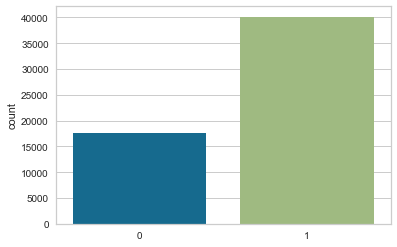

In [5]:
#sentiment analysis with vader

vader_class_sentiments=SentimentAnalysis_Vader(text_samples)
sns.countplot(vader_class_sentiments,label="Count")
plt.show()



In [6]:
#saveList(vader_class_sentiments,"vader_class_sentiments.npy")
vader_class_sentiments=loadList("vader_class_sentiments.npy")

In [7]:
#χωρίζουμε τα σετ εκπαιδευσης και ελεγχου, ωστε να μπορούμε να αξιολογησουμε καθε μοντελο με διαφορετικα τεστ sets
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(text_samples, vader_class_sentiments,test_size=0.2,random_state=1)


Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΧΩΡΙΣ tokenizer:
Number of features: 73880
to accuracy tou CountVectorizer einai: 0.7728100607111882


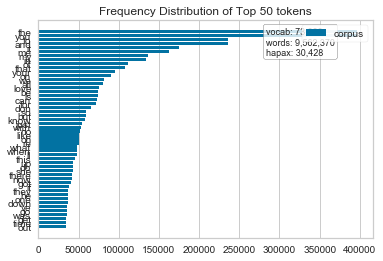

Number of features: 73880
to accuracy tou TFIDF einai 0.7040546400693841


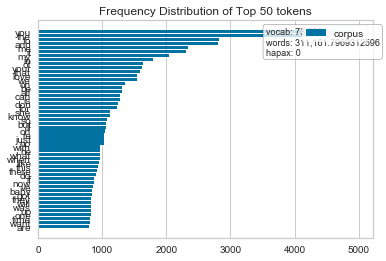

Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΜΕ tokenizer
Number of features: 72672
to accuracy tou CountVectorizer einai: 0.7801170858629661


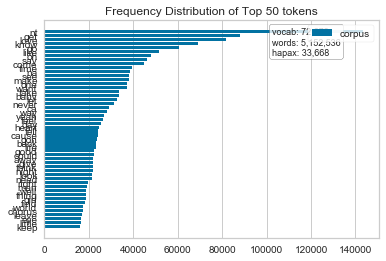

Number of features: 72672
to accuracy tou TFIDF einai 0.7082827406764961


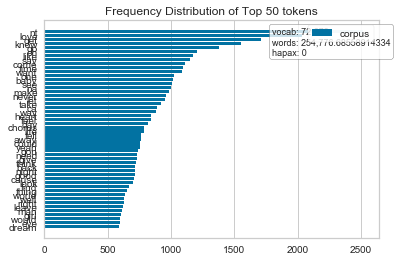

In [11]:
#αξιολόγηση CountVect kai TFIDF gia synaisthimatikh analysh me VADER
#Αξιολόγηση Vectorizers 
#θα καλέσουμε ένα απλό naive bayes μοντέλο με default χαρακτηριστικά, για κάθε vectorizer 
#χωρίς παραμετροποίηση ώστε να δούμε ποιο μοντέλο θα παραμετροποιήσουμε
token_iser='0'
scores=[]
print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΧΩΡΙΣ tokenizer:")
scores.append(countvect_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))

scores.append(tfidf_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))

    
token_iser='1'

print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΜΕ tokenizer")
scores.append(countvect_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))
scores.append(tfidf_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))

#κραταμε CV me tokenizer

In [12]:
# DataFrame Vectorizer Accuracy 
acc_df = pd.DataFrame()
acc_df['params']= ['cvec without tokenizer','tvec without tokenizer','cvec with tokenizer','tvect with tokenizer']
acc_df['scores']= scores
acc_df

,params,scores
0,cvec without tokenizer,0.772810
1,tvec without tokenizer,0.704055
2,cvec with tokenizer,0.780117
3,tvect with tokenizer,0.708283


In [16]:
#optimization vectorizor, opoiou einai kalyteros
ngrams=[1,2,3,4]
mdf_params = [0.25, 0.5, 0.75, 1.0]
maxfeat=[None,5000,20000,50000,100000]

#θα υλοποιησουμε διαφορετικους count vectorizers με logreg για να βρουμε την καλυτερη επιδοση
#θα ορισουμε τις λιστες στις οποιες θα αποθηκευσουμε τα αποτελεσματα
ngram_scores=[]
mdf_scores=[]
maxfeat_scores=[]


token_izer='1'

for mdf in mdf_params:
    mdf_scores.append(countvect_test_maxdf(X_train_v,X_test_v,y_train_v,y_test_v,token_izer,mdf))
print("Τα ποσοστα επιτυχιας του LR για το VADER με διαφορετικά max DF ειναι: {}".format(mdf_scores))
for n in ngrams:
    ngram_scores.append(countvect_test_ngrams(X_train_v,X_test_v,y_train_v,y_test_v,token_izer,n))
print("Τα ποσοστα επιτυχιας του LR για το VADER με διαφορετικά n-grams ειναι: {}".format(ngram_scores))

for mf in maxfeat:
    maxfeat_scores.append(countvect_test_maxfeat(X_train_v,X_test_v,y_train_v,y_test_v,token_izer,mf))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max Features ειναι: {}".format(maxfeat_scores))


Number of features: 72650
To accuracy me Max df: 0.25 είναι : [0.77580225 0.77519514 0.76669558 0.77424111] 
Number of features: 72670
To accuracy me Max df: 0.5 είναι : [0.78265395 0.78282741 0.7725065  0.78204683] 
Number of features: 72672
To accuracy me Max df: 0.75 είναι : [0.78274068 0.78274068 0.77215958 0.78282741] 
Number of features: 72672
To accuracy me Max df: 1.0 είναι : [0.78274068 0.78274068 0.77215958 0.78282741] 
Τα ποσοστα επιτυχιας του LR για το VADER με διαφορετικά max DF ειναι: [0.7729835212489159, 0.7800086730268864, 0.7801170858629661, 0.7801170858629661]
Number of features: 72672
To accuracy me 1-ngrams είναι : [0.78274068 0.78274068 0.77215958 0.78282741] 
Number of features: 1378205
To accuracy me 2-ngrams είναι : [0.77103209 0.77085863 0.76903729 0.76782307] 
Number of features: 4464595
To accuracy me 3-ngrams είναι : [0.76244579 0.76409367 0.75888985 0.75993062] 
Number of features: 8160494
To accuracy me 4-ngrams είναι : [0.73451865 0.73894189 0.72688638 0.

Τα αποτελέσματα για τα διαφορετικά ngrams είναι
   params    scores
0       1  0.780117
1       2  0.769688
2       3  0.761340
3       4  0.734454


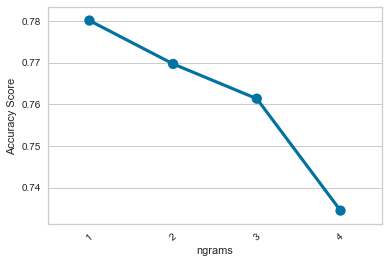

Τα αποτελέσματα για τα διαφορετικά max df είναι
   params    scores
0    0.25  0.772984
1    0.50  0.780009
2    0.75  0.780117
3    1.00  0.780117


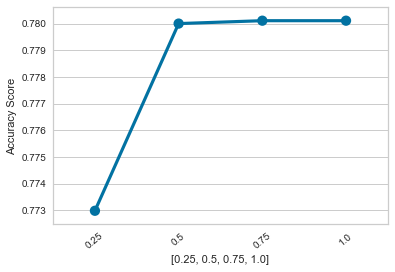

Τα αποτελέσματα για τα διαφορετικά max features είναι
   params    scores
0    None  0.780117
1    5000  0.790698
2   20000  0.780963
3   50000  0.779900
4  100000  0.780117


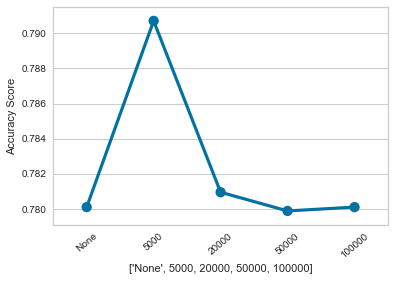

In [17]:
#Δημιουργούμε Dataframes με τα διαφοερτικα αποτελέσματα μας και τα εκτυπώνουμε
ngrams=[1,2,3,4]
ngram_params = ['tvec gram_1','tvec gram_2','tvec gram_3','tvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])
print("Τα αποτελέσματα για τα διαφορετικά ngrams είναι")
print(ngram_df)
# adding cvec score with default params
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

mdf_params = [0.25, 0.5, 0.75, 1.0]
maxdf_df = pd.DataFrame({'params':mdf_params, 'scores':mdf_scores}, index=[0,1,2,3])
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά max df είναι")
print(maxdf_df)
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxdf_df)
plt.ylabel('Accuracy Score')
plt.xlabel(mdf_params)
plt.xticks(rotation=40)
plt.show()

maxfeat=['None',5000,20000,50000,100000]
maxfeat_df = pd.DataFrame({'params':maxfeat, 'scores':maxfeat_scores}, index=[0,1,2,3,4])
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά max features είναι")
print(maxfeat_df)
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxfeat_df)
plt.ylabel('Accuracy Score')
plt.xlabel(maxfeat)
plt.xticks(rotation=40)
plt.show()


In [18]:
#Επιλογή καλύτερων features για τον vectorizer
best_maxfeat=max(maxfeat_scores)#Βλέπουμε ότι το καλύτερο score είναι με maxfeat=5000
best_ngram=max(ngram_scores)
best_mdf=max(mdf_scores)
print("Το καλύτερο σκορ που πετύχαμε με την παραμετροποίηση ήταν το {}".format(max(best_maxfeat,best_ngram,best_mdf)))


Το καλύτερο σκορ που πετύχαμε με την παραμετροποίηση ήταν το 0.7906981786643539


In [10]:
#δοκιμαζουμε με τον καλυτερο vectorizer διαφορετικους classifiers
# initalise the vectoriser 
cvec = CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_features=5000)
# fit the training data on the model
#transform training data into sparse matrix
X_train_cvec=cvec.fit_transform(X_train_v)


X_test_cvec=cvec.transform(X_test_v)
#print(X_train_tvec)

In [49]:
#δοκιμαζουμε διαφορετικούς classifiers
classifier_finder(X_train_cvec,X_test_cvec,y_train_v,y_test_v)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Η επιτυχία του  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8442974131094777
Η επιτυχία του  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) είναι:  0.7915867894605165
Η επιτυχία του  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.7219428886548985


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Η επιτυχία του  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) είναι:  0.7639203215882111


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Η επιτυχία του  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) είναι:  0.8349954174767411
                    params    scores
0     Logistisc Regression  0.844297
1  Multinomial Naive Bayes  0.791587
2            Decision Tree  0.721943
3            Random Forest  0.763920
4               Linear SVC  0.834995


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
# Grid search cross validation¶
grid={"C":np.logspace(-1,1,3), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=5)
logreg_cv.fit(X_train_cvec,y_train_v)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=0.1, penalty=l1, score=0.8606113158465207, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ...... C=0.1, penalty=l1, score=0.8668978972469109, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ...... C=0.1, penalty=l1, score=0.8554086277910253, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ...... C=0.1, penalty=l1, score=0.8642965532191632, total=   0.7s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] ...... C=0.1, penalty=l1, score=0.8607979184735473, total=   0.9s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8668690372940157, total=   0.9s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8635870743873346, total=   0.7s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8599002385599653, total=   0.7s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8659726740403383, total=   0.7s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8553459119496856, total=   0.7s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.8606113158465207, total=   6.4s
[CV] C=0.1, penalty=l2 ...............................................
[CV] .

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.8489052677216562, total=  26.8s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.8508562757424669, total=  28.8s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.8430522436592239, total=  23.0s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.8530240624322567, total=  25.4s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8490893321769297, total=  22.6s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8475715524718127, total=  25.7s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ....... C=1.0, penalty=l2, score=0.850140967252223, total=  38.9s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8343092604641076, total=  36.3s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.8488397310778573, total=  27.3s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8421166775103015, total=  29.7s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8376327769347496, total=   2.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ...... C=10.0, penalty=l1, score=0.841968350314329, total=   2.3s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8306958595274225, total=   2.2s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8398005636245394, total=   3.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ...... C=10.0, penalty=l1, score=0.843235039028621, total=   2.4s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8467374810318664, total=  24.8s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8489052677216562, total=  23.8s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8432690223282029, total=  20.9s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8528072837632777, total=  26.5s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8445359930615784, total=  35.1s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8393321769297485, total=  49.4s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8531771849924095, total=  24.7s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8304055519410106, total=  34.6s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8484059856864021, total=  20.2s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 11.8min finished


[CV] ..... C=10.0, penalty=l2, score=0.8382129689872045, total=  24.1s
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.8619687771032091


In [11]:
#best_clf_vader = LogisticRegression(**logreg_cv.best_params_)
best_clf_vader=LogisticRegression(C=0.1,penalty='l1')
best_clf_vader.fit(X_train_cvec,y_train_v)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
#σωζουμε τα test sets, τον best_clf_vader και τον vectorizer
saveList(X_test_v,"X_test_vader")
saveList(y_test_v,"y_test_vader")
saveList(X_test_cvec,"X_test_vader_dtm")
joblib.dump(best_clf_vader, 'vader_clf.pkl')
joblib.dump(cvec, 'vader_cvec.pkl')

Saved successfully!
Saved successfully!
Saved successfully!


['vader_cvec.pkl']